# Analisando Engajamento no Instagram (Parte 2)

## Pergunta Fundamental

Desejamos obter uma resposta para a pergunta a seguir:

- Qual é a tag que gera mais engajamento?

Os direcionamentos do cliente continuam válidos para esta análise.

## Análise da Base de Dados

### Importação das Bibliotecas

In [1]:
# Importa o numpy com o apelido np
import numpy as np

# Importa o pandas com o apelido pd
import pandas as pd

# Importa o pyplot com o apelido plt
from matplotlib import pyplot as plt

In [2]:
# Configuração para exibição de números decimais
pd.options.display.float_format = '{:,.2f}'.format

# Define um estilo para os gráficos do matplotlib
plt.style.use('seaborn-v0_8')

### Importação da Base de Dados

In [3]:
base = pd.read_excel('dados-instagram.xlsx')

In [4]:
base.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,"82,878.00",Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


### Remoção de Colunas Irrelevantes

In [5]:
base = base.drop('Visualizações', axis='columns')

### Tratamento da Base

In [6]:
base['Tags'].head()

0             Loja
1    Loja/Produtos
2             Loja
3         Produtos
4         Produtos
Name: Tags, dtype: object

**Observação:** É necessário separar as tags de publicações que foram marcadas com mais de uma.

In [7]:
# Divide os textos da coluna Tags com base em uma barra
base['Tags'].str.split('/').head()

0              [Loja]
1    [Loja, Produtos]
2              [Loja]
3          [Produtos]
4          [Produtos]
Name: Tags, dtype: object

**Observação:**
Com o método `.split()` estamos dividindo os textos da coluna `Tags` com base em uma barra, obtendo uma lista com cada uma das partes do texto.

In [8]:
# Coloca cada um dos itens da lista em uma linha diferente
base['Tags'].str.split('/').explode().head()

0        Loja
1        Loja
1    Produtos
2        Loja
3    Produtos
Name: Tags, dtype: object

**Observação:** O método `.explode()` nos permite dividir a linha que contém uma lista de forma que cada item da lista oculpe uma linha do dataframe.

In [9]:
base['Tags'] = base['Tags'].str.split('/')

In [10]:
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,NaN,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,NaN,2958
2,Foto,2021-09-11,2807,9,[Loja],N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,NaN,5164
4,Foto,2021-09-13,4392,45,[Produtos],S,N,NaN,4437


In [11]:
base = base.explode('Tags')
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,NaN,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164


### Agregando Informações

#### Segmentação por Tags

In [12]:
# Filtra a base para obter as publicações sem tags para poder atribuir um valor aos registros nulos
base.loc[base['Tags'].isnull(), 'Tags'] = 'Sem tag'

In [13]:
# Agrupa os dados por tags, calculando a média de curtidas e de comentários
base.groupby('Tags')[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Tags,,
Datas comemorativas,"20,752.25",343.50
Dicas de como usar,"6,833.40",133.60
Influenciadores,"15,197.29",161.71
Loja,"2,865.00",17.67
Novos Produtos,"10,304.89",198.56
Produtos,"6,269.82",94.12
Promoções,"27,458.33",531.00
Sem tag,"15,347.88",207.75
Trends,"20,024.00",352.25


In [14]:
# Obtém uma tabela com dados agregados e ordenados em ordem decrescente de média de curtida
base.groupby('Tags')[['Curtidas', 'Comentários']].mean().sort_values(by='Curtidas', ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Sem tag,"15,347.88",207.75
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


In [15]:
# Armazena a tabela agregado em uma variável
df_tags = base.groupby('Tags')[['Curtidas', 'Comentários']].mean().sort_values(by='Curtidas', ascending=False)

# Redefine os índices
df_tags.reset_index(inplace=True)

In [16]:
# Exibe as cinco primeiras linhas da base
df_tags.head()

,Tags,Curtidas,Comentários
0,Promoções,"27,458.33",531.00
1,Datas comemorativas,"20,752.25",343.50
2,Trends,"20,024.00",352.25
3,Sem tag,"15,347.88",207.75
4,Influenciadores,"15,197.29",161.71


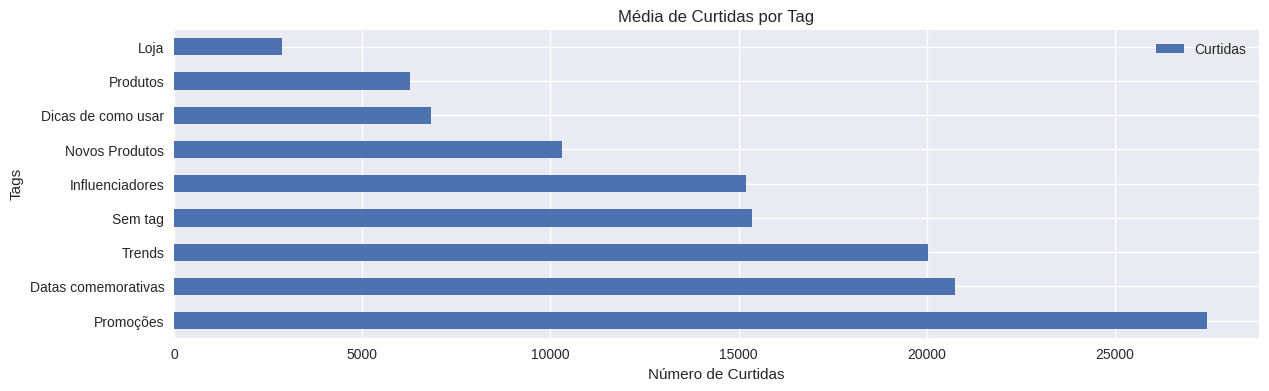

In [26]:
# Plota um gráfico de barras vertical para visualizarmos o total de curtidas por tag
df_tags.plot(kind='barh', x='Tags', y='Curtidas', xlabel='Número de Curtidas', title='Média de Curtidas por Tag', figsize=(14,4))

# Exibe o gráfico
plt.show()

**Observações**: 

- A média de curtidas para publicações marcadas como **Promoção** é de cerca de 27,5 mil, superando a média das marcadas como **Datas comemorativas** (20,7 mil) e da marcadas como **Trends** (20 mil)
- As publicações sem tags tiveram um bom engajamento, com uma méida de 15,3 mil curtidas, ficando atrás apenas das publicações marcadas como **Promoções**, **Datas comemorativas** e **Trends**.

#### Segmentação por Pessoas e por Tags

In [20]:
base.groupby(['Pessoas', 'Tags'])[['Curtidas', 'Comentários']].mean().sort_values(by='Curtidas', ascending=False)

Curtidas  Comentários
Pessoas Tags                                      
S       Promoções           27,458.33       531.00
        Datas comemorativas 20,752.25       343.50
        Trends              20,024.00       352.25
        Sem tag             15,347.88       207.75
        Influenciadores     15,197.29       161.71
        Novos Produtos      10,923.12       215.62
        Produtos             8,316.38       131.62
        Dicas de como usar   6,833.40       133.60
N       Novos Produtos       5,359.00        62.00
        Produtos             4,450.67        60.78
        Loja                 2,865.00        17.67

**Observações:** 

- Todas as tags de publicações que tinham pessoas apresentaram média de curtidas superior a 6,8 mil
- A tag `Loja` não teve um bom desempenho, porém não existia nenhuma publicação com esta tag que envolvia pessoas
- As tags `Produtos` e `Novos Produtos` tiveram desempenho superior quando a publicação envolvia pessoas

#### Segmentação por Campanhas e Tags

In [21]:
base.groupby(['Campanhas', 'Tags'])[['Curtidas', 'Comentários']].mean().sort_values(by='Curtidas', ascending=False)

Curtidas  Comentários
Campanhas Tags                                      
S         Promoções           33,217.50       490.50
          Trends              22,400.67       386.67
          Datas comemorativas 20,752.25       343.50
          Influenciadores     18,715.40       197.60
          Sem tag             16,850.75       257.75
N         Promoções           15,940.00       612.00
          Sem tag             13,845.00       157.75
          Trends              12,894.00       249.00
S         Novos Produtos      11,040.67       323.00
N         Novos Produtos       9,937.00       136.33
S         Produtos             9,074.00        67.50
N         Dicas de como usar   6,833.40       133.60
          Influenciadores      6,402.00        72.00
          Produtos             5,895.93        97.67
          Loja                 2,865.00        17.67

**Observações:**

- A tag `Promoções` quando associada a uma campanha tem excelente engajamento, com uma média de 33,2 mil curtidas, ao passo que as publicações marcadas com esta mesma tag mas sem estarem no contexto de uma campanha tem uma média de 15,9 mil curtidas 
- A tag `Trends` também apresenta melhor desempenho quando a publicação é feita durante uma campanha (média de 22,4 mil curtidas)
- As publicações envolvendo influenciadores durante campanhas apresentam uma média de 18,7 mil curtidas. Se a publicação não envolver uma campanha, a média cai abruptamente para 6,4 mil curtidas
- As publicações com a tag `Novos Produtos` quando associada a uma campanha (11 mil curtidas) parece não ter um resultado significavamente melhor do que as publicações com a mesma tag mas sem envolver uma campanha (9,9 mil curtidas)

## Conclusões

Com base nesta análise, podemos resumir nossas conclusões com estas observações:

- A presença de pessoas nas publicações é essencial para obter um bom engajamento
- As campanhas contribuem muito com a divulgação da marca
- As publicações marcadas com a tag `Promoções` performaram melhor do que todas as outras tags, porém seu uso deve ser analisado pela empresa devido aos custos associados
- Os conteúdos em trend ajudam na divulgação da marca
- É essencial que publicações marcadas com a tag de `Novos Produtos` tenham a presença de pessoas
- A tag `Loja` não foi usada nem em publicações que tinham pessoas e nem durante campanhas, portanto não podemos extrair uma conclusão sólida acerca de seu desempenho
- Para encontrar novos padrões nos dados, é necessário monitorar o desempenho de novas publicações que alimentem a base de dados.